### TASK 1

### Extracting data from excel into a dataframe

In [900]:
import pandas as pd

df = pd.read_excel("Vehicle_Data.xlsx")
df

,Car Make,Price (USD),Horsepower (hp),Top Speed (mph),Category (class)
0,Nissan Micra,17000,109,115,Overseas
1,Nissan Sentra,23000,149,120,Overseas
2,Nissan 370Z,30000,332,160,Overseas
3,Nissan GT-R,210740,600,205,Overseas
4,Infiniti Q50,53500,400,155,Overseas
...,...,...,...,...,...
96,Kia Niro,24690,139,105,Overseas
97,Kia Sedona,42000,276,130,Overseas
98,Acura TLX,50000,355,155,Overseas
99,Jeep patriot,28000,172,115,American


### Encode car_make to have just the first Brand/Manufacturer as numbers using Labelencoder()

In [901]:
import pandas as pd
from sklearn import preprocessing

# Assuming 'car_make' is a column in your DataFrame
car_make = df.iloc[:, 0]

# Define a function to extract the first word
def extract_first_word(text):
    word = text.split(" ")
    return word[0]

# Apply the function to modify the 'car_make' column
car_make = car_make.apply(extract_first_word)

# Define the label encoder
le = preprocessing.LabelEncoder()

# Transform the label into numbers
car_make_encoded = le.fit_transform(car_make)

# Assign the modified and encoded 'car_make' column back to the DataFrame
df.iloc[:, 0] = car_make_encoded

df.iloc[71, [0, 1]]


Car Make           4
Price (USD)    22050
Name: 71, dtype: object

In [902]:
df

,Car Make,Price (USD),Horsepower (hp),Top Speed (mph),Category (class)
0,8,17000,109,115,Overseas
1,8,23000,149,120,Overseas
2,8,30000,332,160,Overseas
3,8,210740,600,205,Overseas
4,5,53500,400,155,Overseas
...,...,...,...,...,...
96,7,24690,139,105,Overseas
97,7,42000,276,130,Overseas
98,0,50000,355,155,Overseas
99,6,28000,172,115,American


### Knn classifier using MinMaxScaler() preprocessor

In [903]:
# Separate attributes and classes
dfX = df.drop(columns=["Category (class)"])
sy = df.iloc[:, 4]
dfX, sy

(    Car Make  Price (USD)  Horsepower (hp)  Top Speed (mph)
 0          8        17000              109              115
 1          8        23000              149              120
 2          8        30000              332              160
 3          8       210740              600              205
 4          5        53500              400              155
 ..       ...          ...              ...              ...
 96         7        24690              139              105
 97         7        42000              276              130
 98         0        50000              355              155
 99         6        28000              172              115
 100        2        50000              363              140
 
 [101 rows x 4 columns],
 0      Overseas
 1      Overseas
 2      Overseas
 3      Overseas
 4      Overseas
          ...   
 96     Overseas
 97     Overseas
 98     Overseas
 99     American
 100    American
 Name: Category (class), Length: 101, dtype: object)

In [904]:
# Separate data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, sy)

y_train, y_test

(92    Overseas
 77    Overseas
 24    American
 31    American
 26    American
         ...   
 65    Overseas
 16    Overseas
 6     Overseas
 76    Overseas
 46    American
 Name: Category (class), Length: 75, dtype: object,
 50    American
 70    Overseas
 4     Overseas
 33    American
 7     Overseas
 61    Overseas
 20    American
 19    American
 49    American
 59    Overseas
 71    Overseas
 98    Overseas
 44    American
 88    Overseas
 8     Overseas
 55    Overseas
 63    Overseas
 27    American
 29    American
 42    American
 0     Overseas
 64    Overseas
 32    American
 30    American
 97    Overseas
 35    American
 Name: Category (class), dtype: object)

In [905]:
from sklearn import preprocessing

## Transform categorical data into numbers
# Define the label encoder
le = preprocessing.LabelEncoder()
lefitted = le.fit(y_train)

# Transform the label into  numbers
y_train_p = lefitted.transform(y_train)

y_train, y_train_p

(92    Overseas
 77    Overseas
 24    American
 31    American
 26    American
         ...   
 65    Overseas
 16    Overseas
 6     Overseas
 76    Overseas
 46    American
 Name: Category (class), Length: 75, dtype: object,
 array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0]))

In [906]:
## Using normalized attribute values
# Define preprocessing tool
nl = preprocessing.MinMaxScaler()

#Fit the normalizer with attribute dataframe
nlfitted = nl.fit(X_train.to_numpy())

# Transform attribute dataframe into an array X with normalized values
X_train_p = nlfitted.transform(X_train.to_numpy())

X_train, X_train_p

(   Car Make  Price (USD)  Horsepower (hp)  Top Speed (mph)
 92        7        21990              146              120
 77        3        19670              141              130
 24        1        15000               98              105
 31        1        73000              355              120
 26        1        22000              153              130
 ..      ...          ...              ...              ...
 65       10        24350              144              120
 16        8        45830              400              120
 6         8        36990              300              140
 76        3        33400              212              110
 46        9        16000              140              120
 
 [75 rows x 4 columns],
 array([[0.66666667, 0.04546374, 0.09561753, 0.19047619],
        [0.22222222, 0.03373116, 0.08565737, 0.28571429],
        [0.        , 0.01011429, 0.        , 0.04761905],
        [0.        , 0.30342874, 0.51195219, 0.19047619],
        [0.        , 0

### Building the machine learning model for classification

In [907]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit classifier using fit method
knn = knn.fit(X_train_p, y_train_p)

# Convert X_test and y_test to arrays
ya_test = le.transform(y_test.to_numpy())
Xa_test = nl.transform(X_test.to_numpy())

# Predict classes of X_test and compare with y_test
knn.predict(Xa_test), ya_test

(array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0]))

In [908]:
# Fraction of instances correctly predicted
# Test data and train data
knn.score(Xa_test, ya_test), knn.score(X_train_p, y_train_p)

(0.9615384615384616, 1.0)

### TASK 2 (A)

### Comparing the values of k with the score (Using MinMaxScaler())

In [909]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

max_k = X_train.shape[0] #Max value of k
k_vals = [] # Values of k
score_train = [] # Scores for train dataset
score_test = [] # Scores for test dataset

for k in range(1, max_k+1):
    # Define the classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit classifier using fit method
    knn = knn.fit(X_train_p, y_train_p)

    # Convert X_test and y_test to arrays
    ya_test = le.transform(y_test.to_numpy())
    Xa_test = nl.transform(X_test.to_numpy())


    # Add values of k and scores to thier respective lists
    k_vals.append(k)
    score_test.append(knn.score(Xa_test, ya_test))
    score_train.append(knn.score(X_train_p, y_train_p))

In [910]:
print(k_vals)
print(score_train)
print(score_test)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[1.0, 0.96, 0.9466666666666667, 0.92, 0.96, 0.9333333333333333, 0.96, 0.9333333333333333, 0.92, 0.8933333333333333, 0.8266666666666667, 0.7866666666666666, 0.8266666666666667, 0.8266666666666667, 0.7066666666666667, 0.7866666666666666, 0.7466666666666667, 0.7733333333333333, 0.76, 0.76, 0.68, 0.6933333333333334, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6933333333333334, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.666666666666

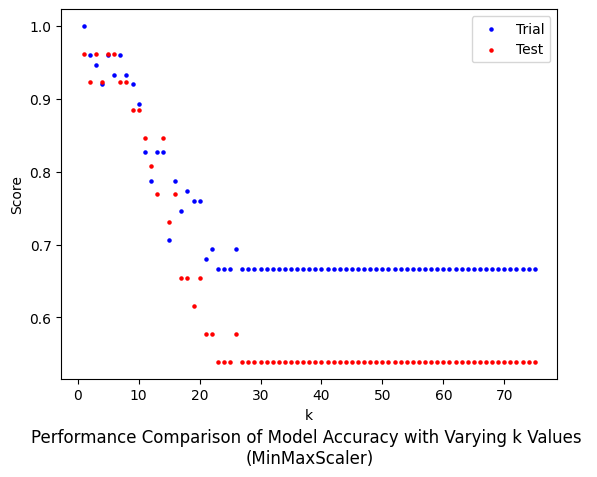

In [911]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

## Draw scatter plot
ax.scatter(k_vals, score_train, c='b', marker='.', s=20, label="Trial")
ax.scatter(k_vals, score_test, c='r', marker='.', s=20, label="Test")

plt.title("Performance Comparison of Model Accuracy with Varying k Values \n(MinMaxScaler)", y = -0.25)
plt.xlabel("k")
plt.ylabel("Score")
plt.legend()
plt.show()

### TASK 2 (B)

### Comparing the values of k with the score (Using StandardScaler())

In [891]:
## Using standardized attribute values
# Define preprocessing tool
stand = preprocessing.StandardScaler()

#Fit the standardizer with attribute dataframe
standfitted = stand.fit(X_train.to_numpy())

# Transform attribute dataframe into an array X with standardized values
X_train_p = standfitted.transform(X_train.to_numpy())

X_train, X_train_p

(   Car Make  Price (USD)  Horsepower (hp)  Top Speed (mph)
 6         8        36990              300              140
 56       10        21000              110              100
 87        7        17590              147              115
 7         8        18340              122              120
 80        3        30900              280              112
 ..      ...          ...              ...              ...
 47        9        19420              177              123
 30        1        50000              420              140
 2         8        30000              332              160
 85        7        17890              147              120
 8         8        30000              175              125
 
 [75 rows x 4 columns],
 array([[ 4.42621574e-01,  1.29168184e-01,  5.96084055e-01,
          6.16277687e-01],
        [ 1.05173383e+00, -5.53533203e-01, -1.41485292e+00,
         -1.53352820e+00],
        [ 1.38065445e-01, -6.99124931e-01, -1.02324940e+00,
         -7.27350991

In [892]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

max_k = X_train.shape[0] #Max value of k
k_vals = [] # Values of k
score_train = [] # Scores for train dataset
score_test = [] # Scores for test dataset

for k in range(1, max_k+1):
    # Define the classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit classifier using fit method
    knn = knn.fit(X_train_p, y_train_p)

    # Convert X_test and y_test to arrays
    ya_test = le.transform(y_test.to_numpy())
    Xa_test = stand.transform(X_test.to_numpy())


    # Add values of k and scores to thier respective lists
    k_vals.append(k)
    score_test.append(knn.score(Xa_test, ya_test))
    score_train.append(knn.score(X_train_p, y_train_p))

In [893]:
print(k_vals)
print(score_train)
print(score_test)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[1.0, 0.8933333333333333, 0.88, 0.8133333333333334, 0.8533333333333334, 0.8266666666666667, 0.8533333333333334, 0.84, 0.7333333333333333, 0.7866666666666666, 0.7066666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7066666666666667, 0.7866666666666666, 0.72, 0.7733333333333333, 0.7066666666666667, 0.72, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68]
[0.8461538461538461, 0.8076923076923077, 0.84615

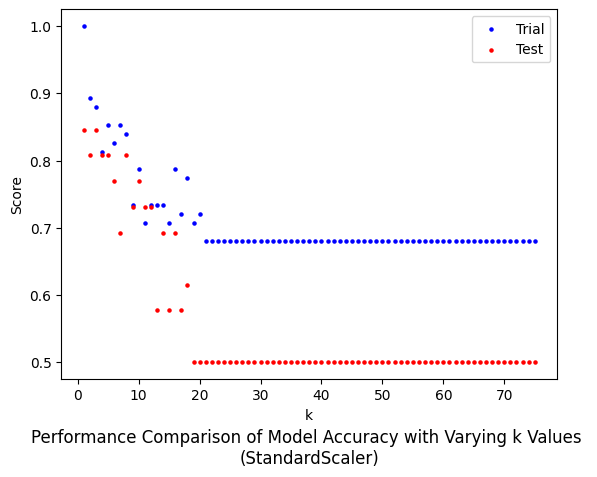

In [894]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

## Draw scatter plot
ax.scatter(k_vals, score_train, c='b', marker='.', s=20, label="Trial")
ax.scatter(k_vals, score_test, c='r', marker='.', s=20, label="Test")

plt.title("Performance Comparison of Model Accuracy with Varying k Values \n(StandardScaler)", y = -0.25)
plt.xlabel("k")
plt.ylabel("Score")
plt.legend()
plt.show()

### TASK 3(a)

### Selected k value is 3 and preferred preprocessor is MinMaxSelector()

In [919]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit classifier using fit method
knn = knn.fit(X_train_p, y_train_p)

# Convert X_test and y_test to arrays
ya_test = le.transform(y_test.to_numpy())
Xa_test = nl.transform(X_test.to_numpy())

# Predict classes of X_test and compare with y_test
knn.predict(Xa_test), ya_test

(array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0]))

In [920]:
# Fraction of instances correctly predicted
# Test data and train data
knn.score(Xa_test, ya_test), knn.score(X_train_p, y_train_p)

(0.9615384615384616, 0.9466666666666667)

### TASK 3(b)

### Confusion matrix

In [921]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(Xa_test)

# Create a confusion matrix
cm = confusion_matrix(ya_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0]
 [ 1 13]]


### TASK 4

In [922]:
import numpy as np
new_car_make = np.array([[4, 21999, 147, 140]])
X_new = nl.transform(new_car_make)
X_new

array([[0.33333333, 0.04550925, 0.09760956, 0.38095238]])

In [923]:
le.inverse_transform(knn.predict(X_new))

array(['Overseas'], dtype=object)